# Bluetooth RSSI - Model evaluation

## Python imports

In [1]:
import numpy as np
import os.path
import matplotlib.pyplot as pyplt
import matplotlib.ticker
import pandas as pd

## Calculate accuracy for all model-test set combinations

In [2]:
MODEL_IDS = [ 'SoftVoting', 'KNN', 'LogisticRegression', 'RandomForest']
#MODEL_IDS = [ 'LogisticRegression','LogisticRegression_Pixel','LogisticRegression_Redmi' ]
DATASET_IDS = ['TS', 'PW', 'RW' ]
#DATASET_IDS = ['TS',  'PTS', 'RTS', 'PW',  'RW']

results = []
for m_id in MODEL_IDS:
    r = [m_id]
    for d_id in DATASET_IDS:
        df = pd.read_csv('results/hybrid/' + m_id + '_' + d_id + '.tsv', sep='\t')
        score = (df['label'] == df['prediction']).astype(float).mean()
        print(m_id, d_id, score)
        r.append(score)
    results.append(r)
 
results.append(['BRSSI (RandomForest)', 0.92, 0.85, 0.82 ])
results.append(['CNN (MobileNetV1)', 0.91, 0.67, 0.79])

plot_data = pd.DataFrame(results, columns=['Model'] + DATASET_IDS)
plot_data

SoftVoting TS 0.9766206163655685
SoftVoting PW 0.8181818181818182
SoftVoting RW 0.9125560538116592
KNN TS 0.9766206163655685
KNN PW 0.8539944903581267
KNN RW 0.9013452914798207
LogisticRegression TS 0.9776833156216791
LogisticRegression PW 0.859504132231405
LogisticRegression RW 0.9080717488789237
RandomForest TS 0.9617428267800212
RandomForest PW 0.8402203856749312
RandomForest RW 0.8609865470852018


,Model,TS,PW,RW
0,SoftVoting,0.976621,0.818182,0.912556
1,KNN,0.976621,0.853994,0.901345
2,LogisticRegression,0.977683,0.859504,0.908072
3,RandomForest,0.961743,0.840220,0.860987
4,BRSSI (RandomForest),0.920000,0.850000,0.820000
5,CNN (MobileNetV1),0.910000,0.670000,0.790000


## Derive plot

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


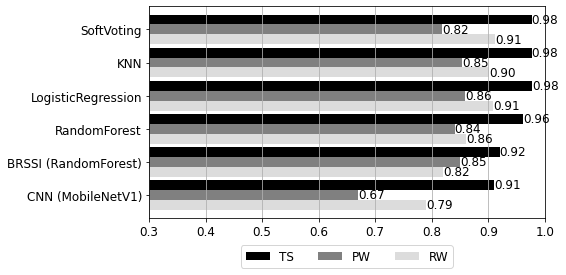

In [3]:
font = {'family' : 'normal',
        'size'   : 12}
pyplt.rc('font', **font)
pyplt.rcParams["figure.figsize"] = (8,4)

plt = plot_data.plot.barh(x='Model',y=DATASET_IDS,color=['black','gray','gainsboro','darkgray','lightgray'],width=0.9)
#plt.legend(loc='lower right',ncol=3)
plt.legend(loc='upper center',ncol=5,bbox_to_anchor=(0.5,-0.1))
#plt.set_xlim([0.65,1.0])
plt.set_xlim([0.3,1.0])
plt.invert_yaxis()
plt.set_ylabel('')
plt.grid(axis='x')
#plt.set_xticklabels(MODELS, rotation=0, ha='center')

for container in plt.containers:
  plt.bar_label(container,fmt='%.2f')
plt.get_figure().tight_layout()
plt.get_figure().savefig('hybrid_model_results.pdf')